In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pandas.plotting import table
import time
import warnings

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice


plt.rcParams['figure.figsize'] = [12, 8]

# Кластеризация

## Задачи машинного обучения

* Обучение с учителем
    * Регрессия
    * Классификация
* Обучение без учителя
    * Кластеризация
    * Снижение размерности
* Обучение с подкреплением

**Обучение без учителя** - есть некоторое количество примеров, про них известны атрибуты, но больше ничего не известно
   * нет меток (ответов) в данных
   * не знаем о том, есть ли структура в данных
   * не знаем о том, какая структура в данных и есть ли скопления похожих элементов
    
## Задача кластеризации
Нужно разбить на группы. Объекты в одной группе должны быть похожи между собой. Объекты разных групп должны отличаться.

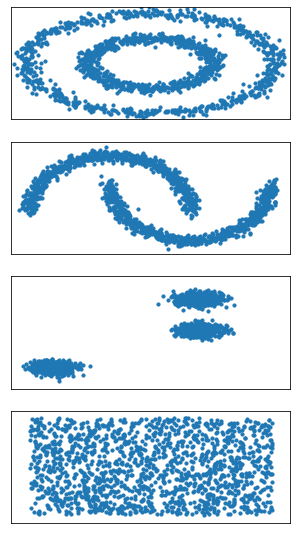

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

n_samples = 1500

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

plt.figure(figsize=(2 + 3, 9.5))

data = [noisy_circles, noisy_moons, blobs, no_structure]
for i_dataset, dataset in enumerate(data):
    X, y = dataset
    
    X = StandardScaler().fit_transform(X)
    
    plt.subplot(4, 1, i_dataset + 1)
    plt.scatter(X[:, 0], X[:, 1], s=10)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xticks(())
    plt.yticks(())

plt.show;

Automatically created module for IPython interactive environment


C:\Users\adwiz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\adwiz\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(
C:\Users\adwiz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environmen

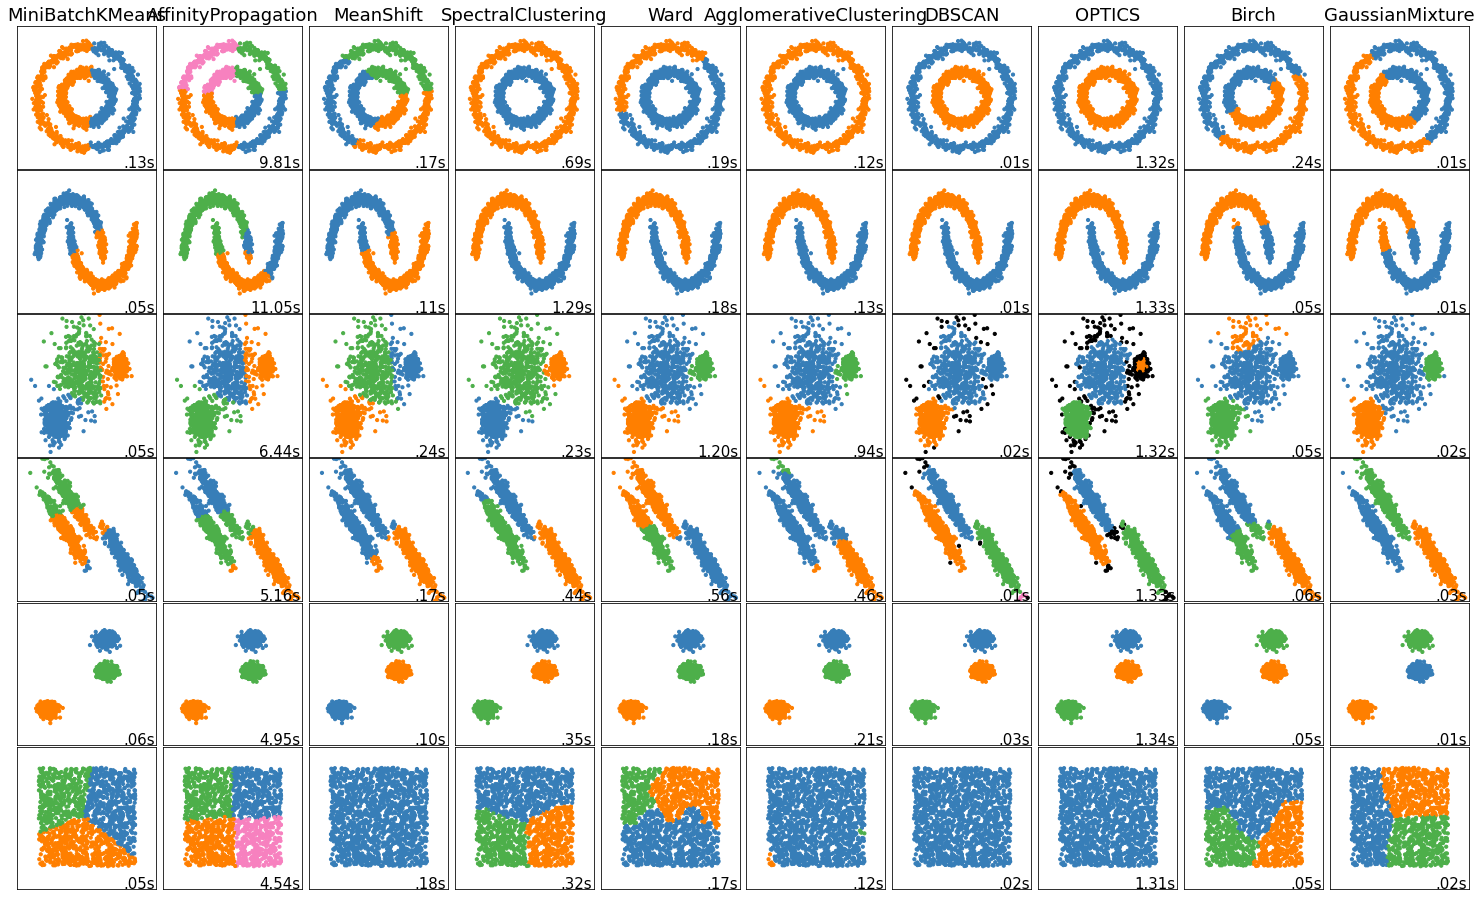

In [3]:
   print(__doc__)

np.random.seed(0)

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    X = StandardScaler().fit_transform(X)

    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    connectivity = 0.5 * (connectivity + connectivity.T)

    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))

        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

0- [1 2 5 4] 1- [1 1 5 6]


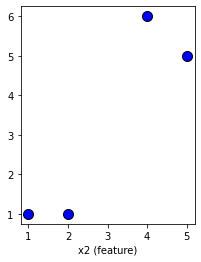

In [4]:
X = np.array([
    [1, 1],
    [2, 1],
    [5, 5],
    [4, 6]
])
print('0-',X[:, 0], '1-', X[:, 1])
plt.scatter(X[:, 0], X[:, 1], c='blue', s=100, edgecolor='black')
plt.xlabel('x1 (feature)')
plt.xlabel('x2 (feature)')
plt.gca().set_aspect('equal', adjustable='box')

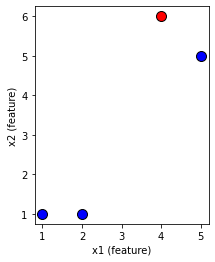

In [5]:
plt.scatter(X[:-1, 0], X[:-1, 1], c='blue', s=100, edgecolor='black')
plt.scatter(X[-1:, 0], X[-1:, 1], c='red', s=100, edgecolor='black')
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.gca().set_aspect('equal', adjustable='box')

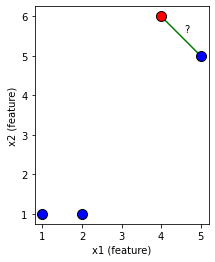

In [6]:
plt.scatter(X[:-1, 0], X[:-1, 1], c='blue', s=100, edgecolor='black', zorder=3)
plt.plot(X[-2:, 0], X[-2:, 1], zorder=2, c='green')
plt.scatter(X[-1:, 0], X[-1:, 1], c='red', s=100, edgecolor='black', zorder=3)
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.text(4.6, 5.6, '?')
plt.gca().set_aspect('equal', adjustable='box')

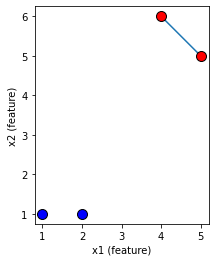

In [7]:
plt.scatter(X[:-2, 0], X[:-2, 1], c='blue', s=100, edgecolor='black')
plt.plot(X[-2:, 0], X[-2:, 1], zorder=2)
plt.scatter(X[-2:, 0], X[-2:, 1], c='red', s=100, edgecolor='black', zorder=3)
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.gca().set_aspect('equal', adjustable='box')

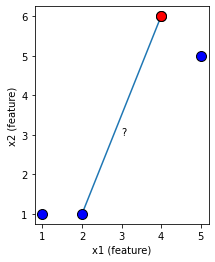

In [8]:
plt.scatter(X[:, 0], X[:, 1], c='blue', s=100, edgecolor='black', zorder=3)
plt.scatter(X[-1:, 0], X[-1:, 1], c='red', s=100, edgecolor='black', zorder=3)
plt.plot(X[1::2, 0], X[1::2, 1], zorder=2)
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.text(3, 3, '?')
plt.gca().set_aspect('equal', adjustable='box')

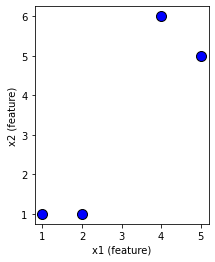

In [9]:
plt.scatter(X[:, 0], X[:, 1], c='blue', s=100, edgecolor='black', zorder=3)
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.gca().set_aspect('equal', adjustable='box')

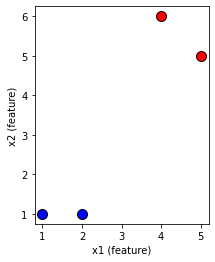

In [10]:
plt.scatter(X[:-2, 0], X[:-2, 1], c='blue', s=100, edgecolor='black')
plt.scatter(X[-2:, 0], X[-2:, 1], c='red', s=100, edgecolor='black')
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.gca().set_aspect('equal', adjustable='box')

5.0


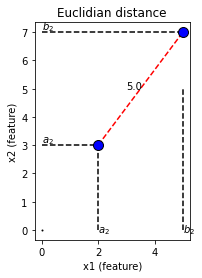

In [11]:
from scipy.spatial import distance

def draw_euclidian():
    X = np.array([
        [0, 0],
        [2, 3],
        [5, 7]
    ])
    dist = distance.euclidean(X[1, :], X[2, :])
    print(dist)
    plt.scatter(X[0, 0], X[0, 1], s=1, edgecolor='black')
    plt.scatter(X[1:, 0], X[1:, 1], zorder=2, c='blue', s=100, edgecolor='black')
    plt.title('Euclidian distance')
    plt.plot([2, 2], [0, 3], '--', zorder=1, c='black')
    plt.plot([5, 5], [0, 5], '--', zorder=1, c='black')    
    plt.plot([0, 2], [3, 3], '--', zorder=1, c='black')    
    plt.plot([0, 5], [7, 7], '--', zorder=1, c='black')    
    plt.plot([2, 5], [3, 7], '--', zorder=1, c='red')
    
    plt.text(0, 3.1, '$a_{2}$')
    plt.text(0, 7.1, '$b_{2}$')
    plt.text(2, -0.1, '$a_{2}$')
    plt.text(5, -0.1, '$b_{2}$')
    plt.text(3, 5, dist)
    
    plt.xlabel('x1 (feature)')
    plt.ylabel('x2 (feature)')
    plt.gca().set_aspect('equal', adjustable='box')

draw_euclidian()

7


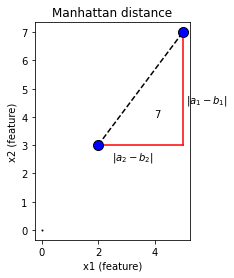

In [12]:
def draw_manhattan_distance():
    X = np.array([
        [0, 0],
        [2, 3],
        [5, 7]
    ])
    dist = distance.cityblock(X[1, :], X[2, :])
    print(dist)
    plt.scatter(X[0, 0], X[0, 1], s=1, edgecolor='black')
    plt.scatter(X[1:, 0], X[1:, 1], zorder=2, c='blue', s=100, edgecolor='black')
    plt.title('Manhattan distance')
    plt.plot([2, 5], [3, 3], zorder=1, c='red')
    plt.plot([5, 5], [3, 7], zorder=1, c='red')
    plt.plot([2, 5], [3, 7], '--', zorder=1, c='black')
    plt.text(2.5, 2.5, '$|a_{2}-b_2|$')
    plt.text(5.1, 4.5, '$|a_{1}-b_1|$')
    plt.text(4, 4, dist)
    plt.xlabel('x1 (feature)')
    plt.ylabel('x2 (feature)')
    plt.gca().set_aspect('equal', adjustable='box')

draw_manhattan_distance()

0.2697285864811044


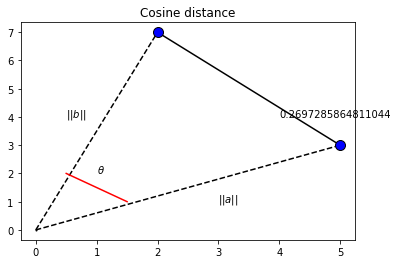

In [13]:
from matplotlib.patches import Arc

def draw_cosine():
    X = np.array([
         [0, 0],
         [2, 7],
         [5, 3]
    ])
    dist = distance.cosine(X[1, :], X[2, :])
    print(dist)
    plt.scatter(X[0, 0], X[0, 1], s=1, edgecolor='black')
    plt.scatter(X[1:, 0], X[1:, 1], zorder=2, c='blue', s=100, edgecolor='black')
    plt.title('Cosine distance')
    plt.plot([0, 2], [0, 7], '--', zorder=1, c='black')
    plt.plot([0, 5], [0, 3], '--', zorder=1, c='black')
    plt.plot([2, 5], [7, 3], zorder=1, c='black')
    plt.text(4, 4, dist)
    plt.text(1, 2, '$\\theta$')
    plt.text(3, 1, '$||a||$')
    plt.text(0.5, 4, '$||b||$')
    plt.plot([0.5, 1.5], [2, 1], zorder=1, c='red')

draw_cosine()

In [14]:
def calc_hamming():
    A = np.array([1, 0, 1, 0])
    B = np.array([1, 1, 0, 1])
    dist = distance.hamming(A, B)
    print(dist)

calc_hamming()

0.75


In [15]:
def calc_jaccard():
    A = np.array([1, 1, 1, 1, 0, 0, 0])
    B = np.array([1, 0, 1, 0, 1, 1, 1])
    dist = distance.jaccard(A, B)
    print(dist)

calc_jaccard()

0.7142857142857143


# Типы алгоритмов кластеризации
   * soft clustering
   * hard clustering

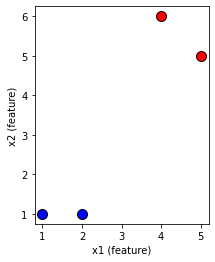

In [16]:
plt.scatter(X[:-2, 0], X[:-2, 1], c='blue', s=100, edgecolor='black')
plt.scatter(X[-2:, 0], X[-2:, 1], c='red', s=100, edgecolor='black')
plt.xlabel('x1 (feature)')
plt.ylabel('x2 (feature)')
plt.gca().set_aspect('equal', adjustable='box')

# K-means
* Выбрать количество кластеров k, которое нам кажется оптимальным для наших данных.
* Выбрать случайным образом k точек (центроидов)
* Для каждой точки определить, у какому центроиду она ближе.
* Переместить каждый центроид в центр выборки, которую мы отнесли к этому центроиду
* Повторять последние два шага или *n_iter* число раз, или когда кластеры сойдутся
    

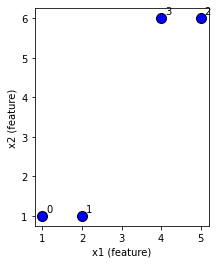

In [17]:
X = np.array([
    [1, 1],
    [2, 1],
    [5, 6],
    [4, 6]
])
plt.scatter(X[:, 0], X[:, 1], c='blue', s=100, edgecolor='black')
for idx, row in enumerate(X) :
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
    plt.xlabel('x1 (feature)')
    plt.ylabel('x2 (feature)')
    plt.gca().set_aspect('equal', adjustable='box')

Зададим k - количество кластеров. Это параметр алгоритма. Будем пользоваться Евклидовым расстоянием для наглядности.

    1. Случайным образом выберем k точек. Можно выбирать точки из выборки, можно взять случайные точки в том же 
    диапазоне.

In [18]:
centroids = np.array([[1, 5], [5, 2]])

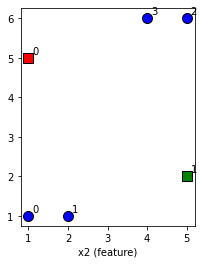

In [19]:
plt.scatter(X[:, 0], X[:, 1], c='blue', s=100, edgecolor='black')
for idx, row in enumerate(X):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
for idx, row in enumerate(centroids):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
plt.scatter(centroids[0, 0], centroids[0, 1], c='red', s=100, edgecolor='black', marker='s')
plt.scatter(centroids[1, 0], centroids[1, 1], c='green', s=100, edgecolor='black', marker='s')
plt.xlabel('x1 (feature)')
plt.ylabel('x2 (feature)')
plt.gca().set_aspect('equal', adjustable='box')

2. Каждой точке поставим метку кластера - ближайший к ней центроид

In [20]:
from scipy.spatial.distance import cdist
labels = cdist(X, centroids).argmin(axis=1)
print(labels)

[0 1 1 0]


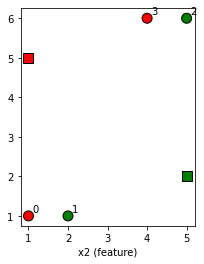

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=['green' if l else 'red' for l in labels], s=100, edgecolor='black')
for idx, row in enumerate(X):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
plt.scatter(centroids[0, 0], centroids[0, 1], c='red', s=100, edgecolor='black', marker='s')
plt.scatter(centroids[1, 0], centroids[1, 1], c='green', s=100, edgecolor='black', marker='s')
plt.xlabel('x1 (feature)')
plt.ylabel('x2 (feature)')
plt.gca().set_aspect('equal', adjustable='box')  

3. Обновим координаты центров кластеров(центроидов). Для этого возьмем точки, отнесенные к центроиду на предыдущем
шаге и посчитаем среднее по каждой координате (центр масс)

In [22]:
centroids = np.array([X[labels == 0].mean(axis=0), X[labels == 1].mean(axis=0)])

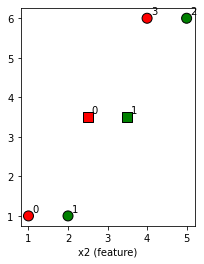

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=['green' if l else 'red' for l in labels], s=100, edgecolor='black')
for idx, row in enumerate(X):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
for idx, row in enumerate(centroids):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
plt.scatter(centroids[0, 0], centroids[0, 1], c='red', s=100, edgecolor='black', marker='s')
plt.scatter(centroids[1, 0], centroids[1, 1], c='green', s=100, edgecolor='black', marker='s')
plt.xlabel('x1 (feature)')
plt.ylabel('x2 (feature)')
plt.gca().set_aspect('equal', adjustable='box')  

4. Будем повторять шаги 2 и 3, пока не достигнем сходимости (пока центры не перестанут изменяться значительно)

In [24]:
from scipy.spatial.distance import cdist
labels = cdist(X, centroids).argmin(axis=1)
print(labels)

[0 0 1 1]


In [25]:
centroids = np.array([X[labels == 0].mean(axis=0), X[labels == 1].mean(axis=0)])

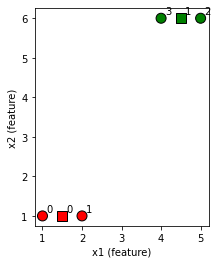

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=['green' if l else 'red' for l in labels], s=100, edgecolor='black')
for idx, row in enumerate(X):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
for idx, row in enumerate(centroids):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
plt.scatter(centroids[0, 0], centroids[0, 1], c='red', s=100, edgecolor='black', marker='s')
plt.scatter(centroids[1, 0], centroids[1, 1], c='green', s=100, edgecolor='black', marker='s')
plt.xlabel('x1 (feature)')
plt.ylabel('x2 (feature)')
plt.gca().set_aspect('equal', adjustable='box')  

In [27]:
from scipy.spatial.distance import cdist
labels = cdist(X, centroids).argmin(axis=1)
print(labels)

[0 0 1 1]


# Подбор $k$ - метод локтя
Выбрать критерий качества кластеризации и построить его значения для K = 1, 2, ...

Text(0, 0.5, 'x2 (feature)')

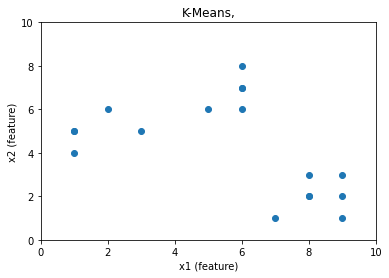

In [29]:
from sklearn.cluster import KMeans
from sklearn import metrics

X = np.array([
    [3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8],
    [5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]
]).T

plt.scatter(X[:, 0], X[:, 1])
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.title('K-Means,')
plt.xlabel('x1 (feature)')
plt.ylabel('x2 (feature)')

## Критерии качества
* инерция - средняя сумма квадратов расстояния до центроида
* средний диаметр кластера
* силуэт

Пусть дана кластеризация в $K$ кластеров, и объект $i$ попал в $C_k$  
$a(i)$ -- среднее расстояние от $i$ объекта до объектов из $C_k$  
$b(i) = min_{j \neq k} b_j(i)$,  где $b_j(i)$ -- среднее расстояние от $i$ объекта до объектов из $C_j$

$$silhouette(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$
Средний silhouette для всех точек из $\mathbf{X}$ является критерием качества кластеризации.

Показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. 

Принимает значения $[−1,1]$. 
$-1$ - плохая (разрозненная) кластеризация.  
$0$ - кластеры пересекаются и накладываются друг на друга  
$1$ - "плотные" четко выделенные кластера  
Чем больше силуэт, тем более четко выделены кластеры, и они представляют собой компактные, плотно сгруппированные облака точек.  


C:\Users\adwiz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adwiz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'The Elbow method show optimal k')

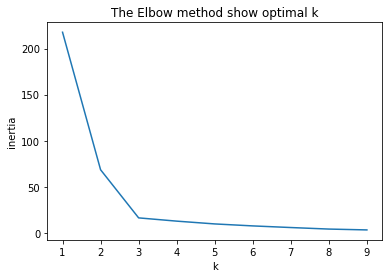

In [35]:
inertia = []
k = range(1, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(X)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow method show optimal k')

[0.6113424368705715, 0.7122079383287169, 0.6389948643127632, 0.46983374375750137, 0.39661977826122785, 0.3889390504750796, 0.35345323083317454, 0.39932610787930767]


Text(0.5, 1.0, 'The Elbow method show optimal k')

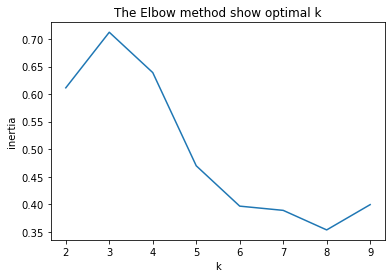

In [37]:
from sklearn.metrics import silhouette_score
inertia = []
k = range(2, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(X)
    km.fit(X)
    inertia.append(silhouette_score(X, km.labels_))

print(inertia)

plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow method show optimal k')

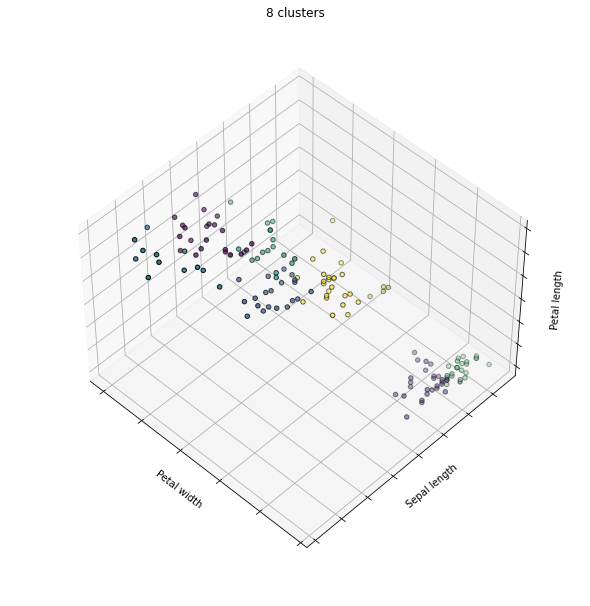

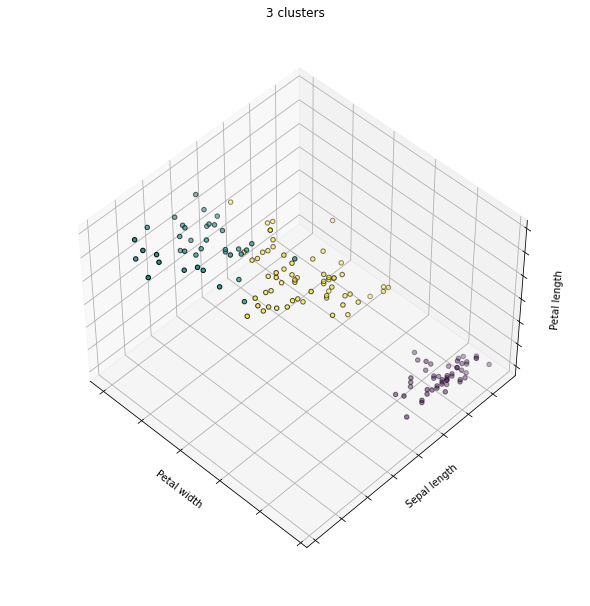

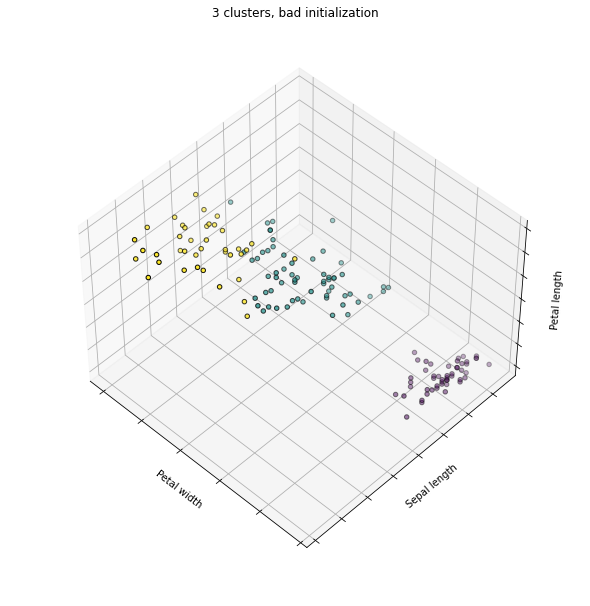

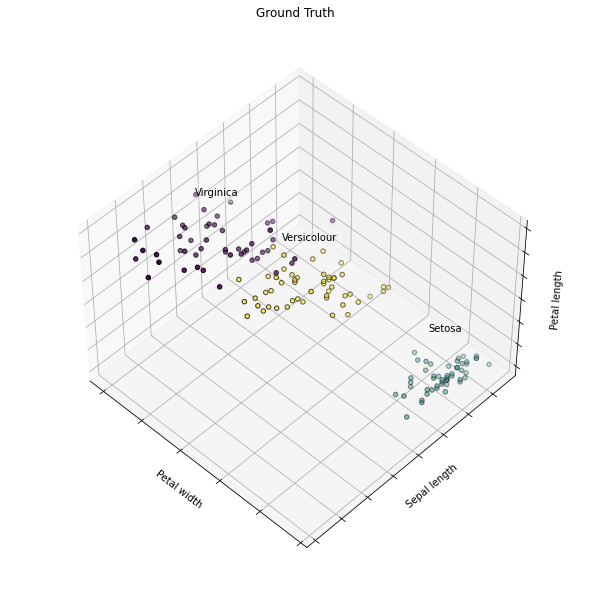

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(12, 8))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(12, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

# Модификации
* mini-batch k-means
* k-means++
* online k-means

# Иерархическая кластеризация

![Linguistic Family Tree](https://images2.minutemediacdn.com/image/upload/c_fit,f_auto,fl_lossy,q_auto,w_728/v1555921404/shape/mentalfloss/tree_1_0.png?itok=sq32pn8w) 

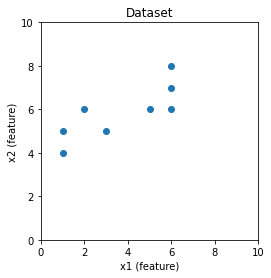

In [45]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [3, 1, 1, 2, 6, 6, 6, 5],
    [5, 4, 5, 6, 8, 6, 7, 6]
]).T

plt.scatter(X[:,0], X[:,1])
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.gca().set_aspect('equal', adjustable='box')

Все элементы сами себе кластеры, найдём два ближайших

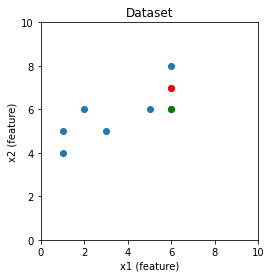

In [46]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[6,0], X[6,1], c='r')
plt.scatter(X[5,0], X[5,1], c='g')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.gca().set_aspect('equal', adjustable='box')

Эти два кластера объединяются в один

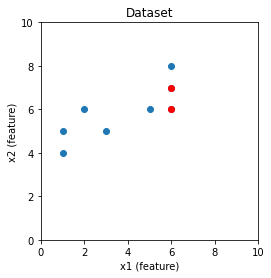

In [48]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[6,0], X[6,1], c='r')
plt.scatter(X[5,0], X[5,1], c='r')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.gca().set_aspect('equal', adjustable='box')

В дальнейшем мы будем искать пары близлежащих кластеров, не забывая при этом, что свежеобразованные кластеры участвуют в следующем разбиении вместо двух своих "родителей".

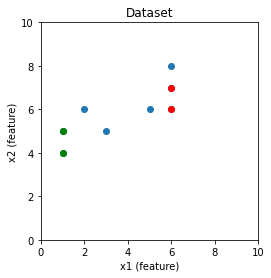

In [49]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[6,0], X[6,1], c='r')
plt.scatter(X[5,0], X[5,1], c='r')
plt.scatter(X[1,0], X[1,1], c='g')
plt.scatter(X[2,0], X[2,1], c='g')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")

plt.gca().set_aspect('equal', adjustable='box')

Каждый шаг разбиения сокращает количество кластеров на один.

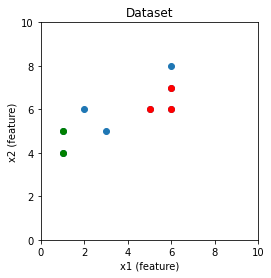

In [50]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[6,0], X[6,1], c='r')
plt.scatter(X[5,0], X[5,1], c='r')
plt.scatter(X[7,0], X[7,1], c='r')
plt.scatter(X[1,0], X[1,1], c='g')
plt.scatter(X[2,0], X[2,1], c='g')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.gca().set_aspect('equal', adjustable='box')

 В итоге мы хотим свести все разбиение к одному большому кластеру. Этот подход называется "снизу вверх" или агломеративный (объединяющий).

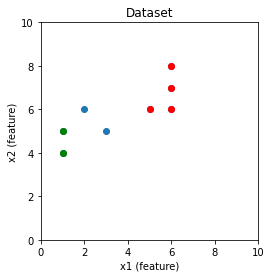

In [51]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[6,0], X[6,1], c='r')
plt.scatter(X[5,0], X[5,1], c='r')
plt.scatter(X[7,0], X[7,1], c='r')
plt.scatter(X[4,0], X[4,1], c='r')
plt.scatter(X[1,0], X[1,1], c='g')
plt.scatter(X[2,0], X[2,1], c='g')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.gca().set_aspect('equal', adjustable='box')

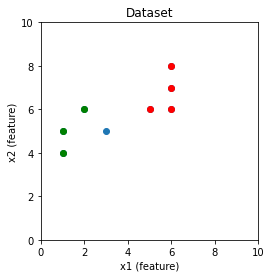

In [52]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[6,0], X[6,1], c='r')
plt.scatter(X[5,0], X[5,1], c='r')
plt.scatter(X[7,0], X[7,1], c='r')
plt.scatter(X[4,0], X[4,1], c='r')
plt.scatter(X[1,0], X[1,1], c='g')
plt.scatter(X[2,0], X[2,1], c='g')
plt.scatter(X[3,0], X[3,1], c='g')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.gca().set_aspect('equal', adjustable='box')

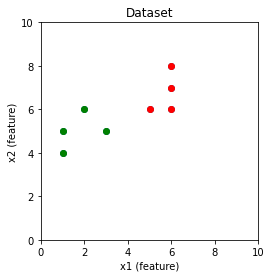

In [53]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[6,0], X[6,1], c='r')
plt.scatter(X[5,0], X[5,1], c='r')
plt.scatter(X[7,0], X[7,1], c='r')
plt.scatter(X[4,0], X[4,1], c='r')
plt.scatter(X[1,0], X[1,1], c='g')
plt.scatter(X[2,0], X[2,1], c='g')
plt.scatter(X[3,0], X[3,1], c='g')
plt.scatter(X[0,0], X[0,1], c='g')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.gca().set_aspect('equal', adjustable='box')

Как мы видим, перед финальным шагом у нас имеется два кластера, которые в итоге объединятся в один "корневой"

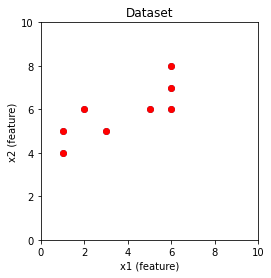

In [54]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[6,0], X[6,1], c='r')
plt.scatter(X[5,0], X[5,1], c='r')
plt.scatter(X[7,0], X[7,1], c='r')
plt.scatter(X[4,0], X[4,1], c='r')
plt.scatter(X[1,0], X[1,1], c='r')
plt.scatter(X[2,0], X[2,1], c='r')
plt.scatter(X[3,0], X[3,1], c='r')
plt.scatter(X[0,0], X[0,1], c='r')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.xlabel("x1 (feature)")
plt.ylabel("x2 (feature)")
plt.gca().set_aspect('equal', adjustable='box')

Если пройти все шаги разбиения в обратном порядке можно построить дерево разбиения, в нашем случае оно будет выглядеть следующим образом:

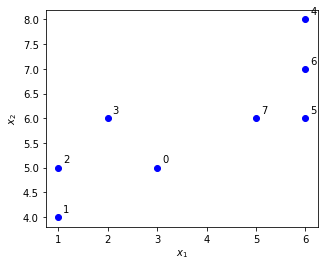

In [60]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, method='centroid', metric='euclidean')

plt.scatter(X[:, 0], X[:, 1], c='blue')
for idx, row in enumerate(X):
    plt.text(row[0] + 0.1, row[1] + 0.1, idx)
plt.xlabel('$x_1$')  
plt.ylabel('$x_2$')
plt.gca().set_aspect('equal', adjustable='box')

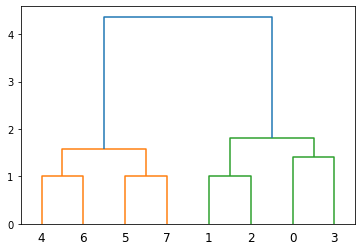

In [61]:
fig, ax = plt.subplots(1, 1)
dend = dendrogram(Z, ax=ax, truncate_mode='lastp')

## EM-кластеризация

<ipython-input-70-8b2bd78e5f9f>:27: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


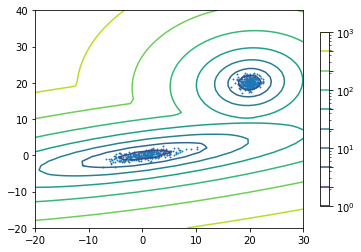

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300

np.random.seed(8)
shifted_gausian = np.random.randn(n_samples, 2) + np.array([20, 20])

C = np.array([[0., -0.7], [3.5, 0.7]])
stretched_gausian = np.dot(np.random.randn(n_samples, 2), C) 

X_train = np.vstack([shifted_gausian, stretched_gausian])

clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)

x = np.linspace(-20, 30)
y = np.linspace(-20, 40)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.axis('tight')
plt.show()
